In [1]:
%load_ext autoreload
%autoreload 2

from ml4a import mask
from ml4a import image

### Create and view mask

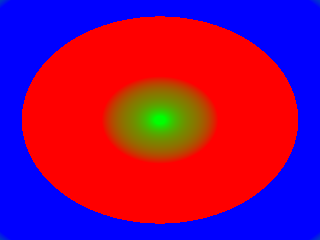

In [2]:
config = {
    'type': 'arcs',
    'size': (320, 240), 
    'num_channels': 3, 
    'period': 10,
    'center': (0.5, 0.5), 
    'radius': 0.3333, 
    'blend': 0.25
}

my_mask = mask.get_mask(config, t=3)
mask.view_mask(my_mask)

### View each channel separately

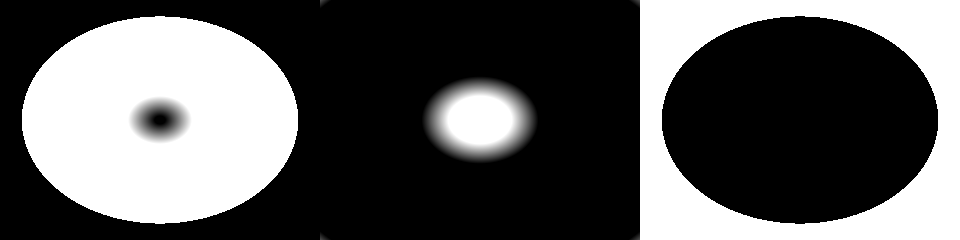

In [3]:
mask.view_mask(my_mask, draw_rgb=False)

### Image masks

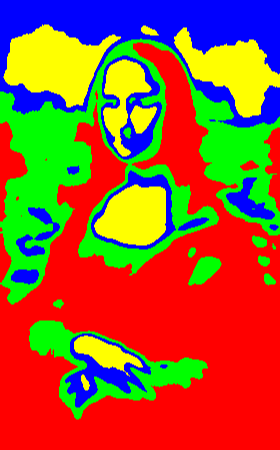

In [4]:
config = {
    'type': 'image',
    'size': (280, 450), 
    'num_channels': 4, 
    'image': 'https://upload.wikimedia.org/wikipedia/commons/6/6a/Mona_Lisa.jpg', 
    'blur_k': 8, 
    'n_dilations': 1
}

my_mask = mask.get_mask(config)
mask.view_mask(my_mask)

### Mask sequences

In [5]:
mask_config = {
    'type': 'rects',
    'size': (600, 180), 
    'num_channels': 3, 
    'p1': (1.0, 0.0), 
    'p2': (0.0, 1.0), 
    'width': 2.5, 
    'period': 20,
    'blend': 0.25, 
    'reverse': True
}

my_masks = [mask.get_mask(mask_config, t) for t in range(40)]
mask.view_mask(my_masks)

### Some more example sequences

In [6]:
num_channels = 3 
size = (256, 256)
period = 30

mask_configs = [
    {
        'name': 'example_mask_interpolations',
        'type': 'interpolation',
        'size': size, 
        'num_channels': 2, 
        'period': period, 
        'blend': 0.2, 
        'reverse': False, 
        'cross_fade': True
    }, {
        'name': 'example_mask_circles1',
        'type': 'arcs',
        'size': size, 
        'num_channels': 3, 
        'period': period,
        'center': (0.5, 0.5), 
        'radius': 1.0, 
        'blend': 0.2, 
        'inwards': True, 
        'reverse': False
    }, {
        'name': 'example_mask_circles2',
        'type': 'arcs',
        'size': size, 
        'num_channels': 6, 
        'period': 5,
        'center': (0.5, 0.5), 
        'radius': 1.0, 
        'blend': 0.1, 
        'inwards': False, 
        'reverse': True
    }, {
        'name': 'example_mask_rectangles',
        'type': 'rects',
        'size': size, 
        'num_channels': 4, 
        'p1': (0.0, 0.0), 
        'p2': (1.0, 1.0), 
        'width': 2.5, 
        'period': period,
        'blend': 0.25, 
        'reverse': True
    }
]

for mask_config in mask_configs:
    mask_frames = [mask.get_mask(mask_config, t) for t in range(period)]
    mask.save_mask_video('media/%s.mp4'%mask_config['name'], mask_frames)


### Displaying video sequences

The above code saved the mask videos as local mp4. The code below will display them inline and the notebook does not get bloated with too many images.

In [7]:
mask_videos = ['media/%s.mp4'%mask_config['name'] for mask_config in mask_configs]
image.display_local(mask_videos)

### Movie sequence


In [8]:
movie = image.MoviePlayer('./media/fingers.mp4')

mask_config = {
    'type': 'image',
    'image': movie,
    'method': 'kmeans',  # or 'threshold' or 'auto'
    'size': (320, 240), 
    'num_channels': 5, 
    'thresholds': [50,100,150,190,245], # for threshold method
    'blend': 0.25, 
    'blur_k': 5, 
    'n_dilations': 2
}

masks = []
for t in range(100, 200):
    curr_mask = mask.get_mask(mask_config, t)
    masks.append(curr_mask)
    mask_config['prev_mask'] = curr_mask

mask.view_mask(masks)

### Getting foreground mask

Using [BASNet](https://github.com/NathanUA/BASNet), we can extract a foreground mask from an image.

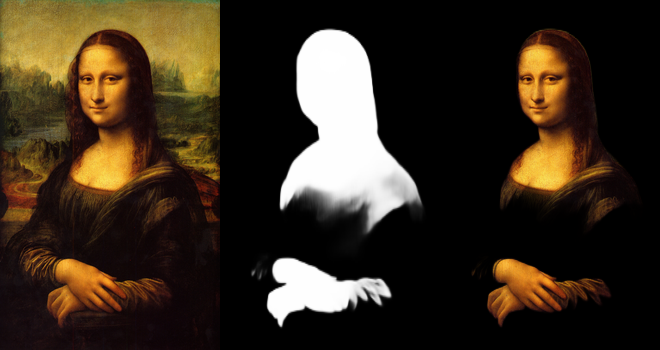

In [9]:
from ml4a.models import basnet

img = image.load_image('https://upload.wikimedia.org/wikipedia/commons/6/6a/Mona_Lisa.jpg', (220, 350))
img_fg = basnet.get_foreground(img)
img_masked = mask.mask_image(img, img_fg)

all_images = image.concatenate_images([img, img_fg, img_masked])
image.display(all_images)

### Foreground mask from movie sequence.

In [10]:
from ml4a.models import basnet

movie = image.MoviePlayer('./media/fingers.mp4')

mov_masked = [mask.mask_image(movie.get_frame(t), basnet.get_foreground(movie.get_frame(t)))
              for t in range(movie.num_frames)]

image.display(mov_masked, animate=True)